In [1]:
using Revise, BifurcationKit, Setfield, LinearAlgebra, Plots, Parameters

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end
norminf(x) = norm(x, Inf)
function HR(u, p)
    
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return [du1, du2, du3,
            du4, du5, du6]
end

HR (generic function with 1 method)

a = 1.0; b = 3.0; c = 1.0; d = 5.0
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.
k1= -0.17; k2 = -0.17
k = 0.0

In [3]:
param =  (a = 1.0, b = 3.0 , c = 1.0, d = 5.0, s = 5.0,
    xr = -1.6, r = 0.01,  I = 4.0, vs = 2.0,
    k1 = -0.17, k2 = -0.17 , k = 0.0)

(a = 1.0, b = 3.0, c = 1.0, d = 5.0, s = 5.0, xr = -1.6, r = 0.01, I = 4.0, vs = 2.0, k1 = -0.17, k2 = -0.17, k = 0.0)

In [4]:
prob_HR = BifurcationProblem(HR, ones(6), param, (@lens _.k);
            recordFromSolution = (x, p) -> (x = x[1]))

┌─ Bifurcation Problem with uType Vector{Float64}
├─ Inplace:  false
├─ Symmetric: false
└─ Parameter: k

In [5]:
prob_HR.params

(a = 1.0, b = 3.0, c = 1.0, d = 5.0, s = 5.0, xr = -1.6, r = 0.01, I = 4.0, vs = 2.0, k1 = -0.17, k2 = -0.17, k = 0.0)

In [39]:
# newton options
opt_newton = NewtonPar(tol = 1e-15, maxIter = 10)

pmax, pmin = 1.0, 0.0
# continuation options
opts_br = ContinuationPar(
                        pMax = pmax, pMin = pmin,
                        detectBifurcation = 3, nev = 6,
                        newtonOptions = opt_newton, maxSteps = 100, nInversion = 4) #,
                        # tolBisectionEigenvalue = 1e-11, dsminBisection = 1e-11)

ContinuationPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  dsmin: Float64 0.001
  dsmax: Float64 0.1
  ds: Float64 0.01
  θ: Float64 0.5
  a: Float64 0.5
  pMin: Float64 0.0
  pMax: Float64 1.0
  maxSteps: Int64 100
  finDiffEps: Float64 1.0e-9
  newtonOptions: NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  η: Float64 150.0
  saveToFile: Bool false
  saveSolEveryStep: Int64 0
  nev: Int64 6
  saveEigEveryStep: Int64 1
  saveEigenvectors: Bool true
  plotEveryStep: Int64 10
  tolStability: Float64 1.0e-10
  detectFold: Bool true
  detectBifurcation: Int64 3
  dsminBisection: Float64 1.0e-16
  nInversion: Int64 4
  maxBisectionSteps: Int64 15
  tolBisectionEigenvalue: Float64 1.0e-16
  detectEvent: Int64 0
  tolParamBisectionEvent: Float64 1.0e-16
  detectLoop: Bool false


In [40]:
opt_newton

NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  tol: Float64 1.0e-15
  maxIter: Int64 10
  verbose: Bool false
  linsolver: DefaultLS
  eigsolver: DefaultEig{typeof(real)}
  linesearch: Bool false
  α: Float64 1.0
  αmin: Float64 0.001


In [41]:
br = continuation(prob_HR, PALC(), setproperties(opts_br; newtonOptions = opt_newton);
    verbosity =3,
    normC = norminf)

#####################################################
────────── PALC ────────────

─────────────────  INITIAL GUESS ────────────────────
--> convergence of initial guess = OK

--> parameter = 0.0, initial step

───────────────── INITIAL TANGENT ───────────────────
--> convergence of the initial guess = OK

--> parameter = 6.666666666666667e-5, initial step (bis)
Predictor:  Secant
──────────────────────────────────────────────────────────────────────
Continuation Step 0 
Step size = 1.0000e-02
Parameter k = 0.0000e+00 ⟶  1.4142e-02 [guess]
--> Step Converged in 0 Nonlinear Iteration(s)
Parameter k = 0.0000e+00 ⟶  1.4142e-02
--> Computed 6 eigenvalues in 1 iterations, #unstable = 4
Predictor:  Secant
──────────────────────────────────────────────────────────────────────
Continuation Step 1 
Step size = 1.5000e-02
Parameter k = 1.4142e-02 ⟶  3.5355e-02 [guess]
--> Step Converged in 0 Nonlinear Iteration(s)
Parameter k = 1.4142e-02 ⟶  3.5355e-02
--> Computed 6 eigenvalues in 1 iterations

5-element Vector{ComplexF64}:
 -0.012482123142393189 - 0.0765442621182694im
 -0.012482123142393189 + 0.0765442621182694im
   0.04363765930765134 + 0.0im
    0.1171405810457483 + 0.0im
      -7.2685720091863 + 0.0im

Predictor:  Secant
----> 1 - [Bisection] (n1, n_current, n2) = (4, 2, 2), ds = -0.025 p = 0.6474446465239326, #reverse = 0
----> bifurcation ∈ (0.5767339684052778, 0.6474446465239326), precision = 7.071E-02
----> 6 Eigenvalues closest to ℜ=0:


5-element Vector{ComplexF64}:
 -0.004095078600958705 - 0.07693009822485866im
 -0.004095078600958705 + 0.07693009822485866im
   0.04363765930765091 + 0.0im
   0.11714058104574869 + 0.0im
    -7.268572009186301 + 0.0im

Predictor:  Secant
----> 2 - [Bisection] (n1, n_current, n2) = (4, 4, 2), ds = 0.0125 p = 0.6120893074646052, #reverse = 1
----> bifurcation ∈ (0.6120893074646052, 0.6474446465239326), precision = 3.536E-02
----> 6 Eigenvalues closest to ℜ=0:


5-element Vector{ComplexF64}:
 0.0001932691553524716 - 0.07677255420304438im
 0.0001932691553524716 + 0.07677255420304438im
   0.04363765930765063 + 0.0im
   0.11714058104574884 + 0.0im
    -7.268572009186305 + 0.0im

Predictor:  Secant
----> 3 - [Bisection] (n1, n_current, n2) = (4, 2, 2), ds = -0.00625 p = 0.6297669769942689, #reverse = 2
----> bifurcation ∈ (0.6120893074646052, 0.6297669769942689), precision = 1.768E-02
----> 6 Eigenvalues closest to ℜ=0:


5-element Vector{ComplexF64}:
 -0.001958934754807299 - 0.07688164132901337im
 -0.001958934754807299 + 0.07688164132901337im
   0.04363765930765166 + 0.0im
   0.11714058104574838 + 0.0im
    -7.268572009186305 + 0.0im

Predictor:  Secant
----> 4 - [Bisection] (n1, n_current, n2) = (4, 2, 2), ds = -0.003125 p = 0.620928142229437, #reverse = 2
----> bifurcation ∈ (0.6120893074646052, 0.620928142229437), precision = 8.839E-03
----> 6 Eigenvalues closest to ℜ=0:


5-element Vector{ComplexF64}:
 -0.0008848500402049708 - 0.07683477412114573im
 -0.0008848500402049708 + 0.07683477412114573im
    0.04363765930765134 + 0.0im
    0.11714058104574772 + 0.0im
     -7.268572009186308 + 0.0im

Predictor:  Secant
----> 5 - [Bisection] (n1, n_current, n2) = (4, 2, 2), ds = -0.0015625 p = 0.6165087248470211, #reverse = 2
----> bifurcation ∈ (0.6120893074646052, 0.6165087248470211), precision = 4.419E-03
----> 6 Eigenvalues closest to ℜ=0:


5-element Vector{ComplexF64}:
 -0.0003462959747043484 - 0.07680559606578503im
 -0.0003462959747043484 + 0.07680559606578503im
   0.043637659307651865 + 0.0im
    0.11714058104574708 + 0.0im
    -7.2685720091863075 + 0.0im

Predictor:  Secant
----> 6 - [Bisection] (n1, n_current, n2) = (4, 2, 2), ds = -0.00078125 p = 0.6142990161558132, #reverse = 2
----> bifurcation ∈ (0.6120893074646052, 0.6142990161558132), precision = 2.210E-03
----> 6 Eigenvalues closest to ℜ=0:


5-element Vector{ComplexF64}:
 -7.663994586619254e-5 - 0.07678955975197989im
 -7.663994586619254e-5 + 0.07678955975197989im
   0.04363765930765186 + 0.0im
   0.11714058104574775 + 0.0im
    -7.268572009186304 + 0.0im

Predictor:  Secant
----> 7 - [Bisection] (n1, n_current, n2) = (4, 4, 2), ds = 0.000390625 p = 0.6131941618102091, #reverse = 3
----> bifurcation ∈ (0.6131941618102091, 0.6142990161558132), precision = 1.105E-03
----> 6 Eigenvalues closest to ℜ=0:


5-element Vector{ComplexF64}:
 5.8282951533353625e-5 - 0.07678117833963348im
 5.8282951533353625e-5 + 0.07678117833963348im
  0.043637659307651615 + 0.0im
   0.11714058104574734 + 0.0im
    -7.268572009186301 + 0.0im

Predictor:  Secant
----> 8 - [Bisection] (n1, n_current, n2) = (4, 2, 2), ds = -0.0001953125 p = 0.6137465889830112, #reverse = 4
----> bifurcation ∈ (0.6131941618102091, 0.6137465889830112), precision = 5.524E-04
----> 6 Eigenvalues closest to ℜ=0:


5-element Vector{ComplexF64}:
 -9.18640807279561e-6 - 0.07678539936025705im
 -9.18640807279561e-6 + 0.07678539936025705im
  0.04363765930765134 + 0.0im
  0.11714058104574769 + 0.0im
   -7.268572009186305 + 0.0im

----> Found at p = 0.6137465889830112, δn = 2, δim = 2 from p = 0.7181553246425874
----> Leaving [Loc-Bif]
--> hopf Bifurcation point at p ≈ 0.6137465889830112, δn_unstable = 2,  δn_imag = 2
──────────────────────────────────────────────────────────────────────
Continuation Step 9 
Step size = 1.0000e-01
Parameter k = 6.1375e-01 ⟶  7.5517e-01 [guess]
--> Step Converged in 0 Nonlinear Iteration(s)
Parameter k = 6.1375e-01 ⟶  7.5517e-01
--> Computed 6 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──────────────────────────────────────────────────────────────────────
Continuation Step 10 
Step size = 1.0000e-01
Parameter k = 7.5517e-01 ⟶  8.9659e-01 [guess]
--> Step Converged in 0 Nonlinear Iteration(s)
Parameter k = 7.5517e-01 ⟶  8.9659e-01
--> Computed 6 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──────────────────────────────────────────────────────────────────────
Continuation Step 11 
Step size = 1.0000e-01
Parameter k = 8.9659e-01 ⟶  1.0000e+00 [gu

 ┌─ Number of points: 13
 ├─ Curve of EquilibriumCont
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter k starts at 0.0, ends at 1.0
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1,     hopf at k ≈ +0.61374659 ∈ (+0.61319416, +0.61374659), |δp|=6e-04, [converged], δ = (-2, -2), step =   9, eigenelements in eig[ 10], ind_ev =   4
- #  2, endpoint at k ≈ +1.00000000,                                                                     step =  12


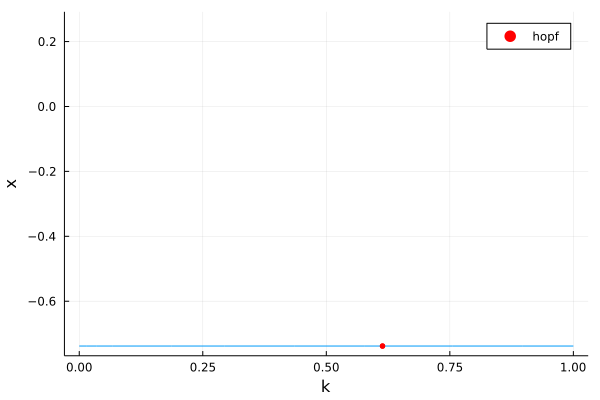

In [35]:
plot(br)

In [36]:
hp_codim2 = continuation(br, 1, (@lens _.k1),
	ContinuationPar(opts_br, pMin = -0.5, pMax = 0.5,
		ds = -0.001, dsmax = 0.05) ;
	normC = norminf,
	# detection of codim 2 bifurcations with bisection
	detectCodim2Bifurcation = 2,
	# tell to start the Hopf problem using eigen elements: compute left eigenvector
	startWithEigen = true,
	# we update the Hopf problem at every continuation step
	updateMinAugEveryStep = 1,
	# compute both sides of the initial condition
	bothside = true,
    verbosity = 3
	)

#####################################################
────────── PALC ────────────

─────────────────  INITIAL GUESS ────────────────────
--> convergence of initial guess = OK

--> parameter = -0.17, initial step

───────────────── INITIAL TANGENT ───────────────────
--> convergence of the initial guess = OK

--> parameter = -0.17000666666666667, initial step (bis)
Predictor:  Secant
──────────────────────────────────────────────────────────────────────
Continuation Step 0 
Step size = -1.0000e-03
Parameter k1 = -1.7000e-01 ⟶  -1.7141e-01 [guess]
--> Step Converged in 1 Nonlinear Iteration(s)
Parameter k1 = -1.7000e-01 ⟶  -1.7141e-01
--> Computed 6 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
--> Event values: (0.07678482814861563, -0.0006531463431291472, 2) --> (0.07678464477362822, -0.0006442022660491404, 2)
──────────────────────────────────────────────────────────────────────
Continuation Step 1 
Step size = -1.4050e-03
Parameter k1 = -1.7141e-01 ⟶  -1.7340e-01 [gu

-7.280064034938603 + 0.0im
-8.268468403560677 + 0.0im
----> 2 - [Bisection] (n1, n_current, n2) = ((1, 2), (2, 2), (2, 2))
			ds = 0.0034012051532350024, p = -0.2734941687794438, #reverse = 2
----> event ∈ (-0.2734941687794438, -0.2638769436195893), precision = 9.617E-03
Predictor:  Secant

----> eve (current) (0.07677141965306976, 1.844456823352084e-5, 2) --> (0.07677204196824217, -1.35304558519966e-5, 2)
----> eigvals = 
0.1144576593452455 + 0.0im
0.044711322598991673 + 0.0im
5.551115123125783e-17 - 0.07677204196824228im
5.551115123125783e-17 + 0.07677204196824228im
-7.2795266400860354 + 0.0im
-8.268336325577213 + 0.0im
----> 3 - [Bisection] (n1, n_current, n2) = ((1, 2), (1, 2), (2, 2))
			ds = -0.0017006025766175012, p = -0.2686855568109763, #reverse = 3
----> event ∈ (-0.2734941687794438, -0.2686855568109763), precision = 4.809E-03
Predictor:  Secant

----> eve (current) (0.07677204196824217, -1.35304558519966e-5, 2) --> (0.07677173080232191, 2.447485081400326e-6, 2)
----> eigvals

 ┌─ Number of points: 38
 ├─ Curve of HopfCont
 ├─ Type of vectors: BorderedArray{Vector{Float64}, Vector{Float64}}
 ├─ Parameter k1 starts at 0.5, ends at -0.5
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at k1 ≈ +0.50000000,                                                                     step =   0
- #  2,       gh at k1 ≈ -0.27108986 ∈ (-0.27108986, -0.26868556), |δp|=2e-03, [converged], δ = ( 0,  0), step =  32, eigenelements in eig[ 33], ind_ev =   0
- #  3, endpoint at k1 ≈ -0.50000000,                                                                     step =  37


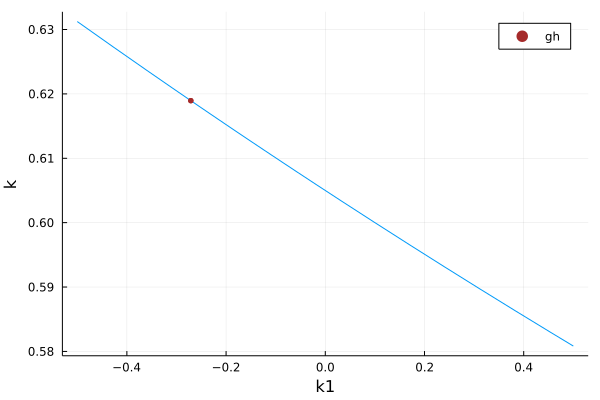

In [37]:
plot(hp_codim2)

In [38]:
nf =  getNormalForm(hp_codim2, 2)

┌ Info: Recomputing eigenvector on the fly
└ @ BifurcationKit C:\Users\Alex\.julia\packages\BifurcationKit\8IcKy\src\codim2\NormalForms.jl:646
┌ Info: The eigenvalue is 4.77048955893622e-16 + 0.07677173080232212im
└ @ BifurcationKit C:\Users\Alex\.julia\packages\BifurcationKit\8IcKy\src\codim2\NormalForms.jl:649
┌ Warning: true
│   "We did not find the correct eigenvalue $(λ). We found $(_λ[_ind])" = We did not find the correct eigenvalue 0.0 + 0.07677173080232191im. We found 4.77048955893622e-16 + 0.07677173080232212im
└ @ BifurcationKit C:\Users\Alex\.julia\packages\BifurcationKit\8IcKy\src\codim2\NormalForms.jl:650


Bautin bifurcation point at (:k, :k1) ≈ (0.6189496277966194, -0.27108986294801735).
ω = 0.07677173080232191
Second lyapunov coefficient l2 = 7.351584863732245e-5
Normal form: i⋅ω⋅u + l2⋅u⋅|u|⁴
Normal form coefficients (detailed):
(ω = 0.07677173080232191, G21 = 2.428160881811519e-6 - 0.0002235339662537499im, G32 = 0.0008821901836478694 + 0.011049666228551018im, l2 = 7.351584863732245e-5)
